<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/up_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Candel, A., Parmar, V., LeDell, E., and Arora, A. (Jun 2020). Deep Learning
with H2O. http://h2o.ai/resources.

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/DeepLearningBooklet.pdf?_ga=2.184768361.1553179602.1592730801-433090902.1592730801



In [1]:
!nvidia-smi

Mon Jun 22 05:54:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 128.4MB 98kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.5-py2.py3-none-any.whl size=128410595 sha256=3f0a51dae9fca061d4da01871e8fb0a97bfc33aca934a0eaff8ad0a33b970a69
  Stored in directory: /root/.cache/pip/wheels/52/ac/34/be36def52a75ce00aadf2312a66db43e1bb6226e0d4cc51905
Successfully built h2o


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import urllib
import h2o
from h2o.automl import H2OAutoML
import sys
import os

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
print('matplotlib: {}'.format(matplotlib.__version__))
#print('sklearn: {}'.format(sklearn.__version__))
#print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('sys: {}'.format(sys.version))

matplotlib: 3.2.1
seaborn: 0.10.1
pandas: 1.0.4
numpy: 1.18.5
sys: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc1sjtqe2
  JVM stdout: /tmp/tmpc1sjtqe2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpc1sjtqe2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_82r5i7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [7]:
# Get help
#help(h2o.estimators.glm.H2OGeneralizedLinearEstimator)
#help(h2o.estimators.gbm.H2OGradientBoostingEstimator)
#help(h2o.estimators.deeplearning.H2ODeepLearningEstimator)

# Show a demo
#h2o.demo("glm")
#h2o.demo("gbm")
#h2o.demo("deeplearning")

### 여러 파일 준비

In [8]:
BASE_DIR = '/content'
#OUTPUT_FILE = os.path.join(BASE_DIR, 'tmp.csv')

#hkim_data=urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', OUTPUT_FILE)

# 드라이브 전체공유 후..

# column_2C_weka.csv
#hkim_data=urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1oMEvI6gWC4ZAqssQ3s3j6RkWUPa_TSwY', OUTPUT_FILE)

#churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [14]:
OUTPUT_FILE = os.path.join(BASE_DIR, 'QMS_merge_sort_ALL.csv')
df = pd.read_csv(OUTPUT_FILE, delimiter = ',')
df.shape

(446621, 31)

In [15]:
df.head()

,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.lastlogtime,a2.errtype,a2.errtype_nm,a2.cust_num,a2.model_mac,a2.buffer_overflow,a2.pcr_lock_status,a2.pts_advanced_error,a2.lost_packet_count,a2.packet_loss_period,a2.stb_rtp_errcnt,a2.no_stream_error,a2.stb_firmware_version,a2.no_stream_error_sum,a2.pcr_lock_status_sum,a2.pts_advanced_error_sum,a2.stb_rtp_errcnt_sum,a2.logtime,a2.not_decoding_error,a2.not_decoding_error_sum,a2.mday,a2.bdp_load_dttm,a2.bdp_load_user_id,a2.p_basis_yyyy,a2.p_basis_mm,a2.p_basis_dd,a2.p_basis_hh,a2.model_nm
0,761343,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:00.000000,2020-06-01 05:00:00.000000,26.0,1일 1회 주기로 최신 업데이트된 리모컨 진단 정보 전송,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-01 05:00:00.000000,2020-06-01 05:15:41.676770,NaN,NaN,NaN,NaN,NaN,S60UPI
1,633634,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:01.000000,2020-06-01 05:00:01.000000,16.0,SLEEP To Active 모드 전환,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-01 05:00:01.000000,2020-06-01 05:15:41.676770,NaN,NaN,NaN,NaN,NaN,S60UPI
2,761344,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:02.000000,2020-06-01 05:00:02.000000,31.0,HDMI 연결상태 변경,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-01 05:00:02.000000,2020-06-01 05:15:41.676770,NaN,NaN,NaN,NaN,NaN,S60UPI
3,761345,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:13.000000,2020-06-01 05:00:13.000000,31.0,HDMI 연결상태 변경,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-01 05:00:14.000000,2020-06-01 05:15:41.676770,NaN,NaN,NaN,NaN,NaN,S60UPI
4,633635,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 17:08:45.000000,2020-06-01 17:08:45.000000,16.0,SLEEP To Active 모드 전환,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-01 17:08:45.000000,2020-06-01 17:15:47.098461,NaN,NaN,NaN,NaN,NaN,S60UPI


In [10]:
hdf = h2o.import_file(OUTPUT_FILE)
hdf.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,a1.ucube_jnr_no,a2.firstlogtime,a2.lastlogtime,a2.errtype,a2.errtype_nm,a2.cust_num,a2.model_mac,a2.buffer_overflow,a2.pcr_lock_status,a2.pts_advanced_error,a2.lost_packet_count,a2.packet_loss_period,a2.stb_rtp_errcnt,a2.no_stream_error,a2.stb_firmware_version,a2.no_stream_error_sum,a2.pcr_lock_status_sum,a2.pts_advanced_error_sum,a2.stb_rtp_errcnt_sum,a2.logtime,a2.not_decoding_error,a2.not_decoding_error_sum,a2.mday,a2.bdp_load_dttm,a2.bdp_load_user_id,a2.p_basis_yyyy,a2.p_basis_mm,a2.p_basis_dd,a2.p_basis_hh,a2.model_nm
761343,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:00,2020-06-01 05:00:00,26,1일 1회 주기로 최신 업데이트된 리모컨 진단 정보 전송,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 05:00:00,2020-06-01 05:15:41,,nan,nan,nan,nan,S60UPI
633634,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:01,2020-06-01 05:00:01,16,SLEEP To Active 모드 전환,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 05:00:01,2020-06-01 05:15:41,,nan,nan,nan,nan,S60UPI
761344,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:02,2020-06-01 05:00:02,31,HDMI 연결상태 변경,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 05:00:02,2020-06-01 05:15:41,,nan,nan,nan,nan,S60UPI
761345,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:13,2020-06-01 05:00:13,31,HDMI 연결상태 변경,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 05:00:14,2020-06-01 05:15:41,,nan,nan,nan,nan,S60UPI
633635,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 17:08:45,2020-06-01 17:08:45,16,SLEEP To Active 모드 전환,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 17:08:45,2020-06-01 17:15:47,,nan,nan,nan,nan,S60UPI
761346,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 17:08:45,2020-06-01 17:08:45,31,HDMI 연결상태 변경,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 17:08:46,2020-06-01 17:15:47,,nan,nan,nan,nan,S60UPI
761347,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 17:08:51,2020-06-01 17:08:51,38,채널 전환 지연,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 17:08:52,2020-06-01 17:15:47,,nan,nan,nan,nan,S60UPI
633636,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 17:09:11,2020-06-01 17:09:11,11,ethernet port up,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 17:09:11,2020-06-01 17:15:47,,nan,nan,nan,nan,S60UPI
633637,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 17:09:11,2020-06-01 17:09:11,12,DHCP 서버로부터 IP 획득 성공,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 17:09:11,2020-06-01 17:15:47,,nan,nan,nan,nan,S60UPI
761348,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 17:09:26,2020-06-01 17:09:26,22,BT 연결 CONNECTED,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 17:09:26,2020-06-01 17:15:47,,nan,nan,nan,nan,S60UPI


In [11]:
#df.types
hdf.types

{'C1': 'int',
 'a1.ucube_jnr_no': 'enum',
 'a2.bdp_load_dttm': 'time',
 'a2.bdp_load_user_id': 'enum',
 'a2.buffer_overflow': 'int',
 'a2.cust_num': 'enum',
 'a2.errtype': 'int',
 'a2.errtype_nm': 'enum',
 'a2.firstlogtime': 'time',
 'a2.lastlogtime': 'time',
 'a2.logtime': 'int',
 'a2.lost_packet_count': 'int',
 'a2.mday': 'time',
 'a2.model_mac': 'enum',
 'a2.model_nm': 'enum',
 'a2.no_stream_error': 'int',
 'a2.no_stream_error_sum': 'int',
 'a2.not_decoding_error': 'int',
 'a2.not_decoding_error_sum': 'int',
 'a2.p_basis_dd': 'int',
 'a2.p_basis_hh': 'int',
 'a2.p_basis_mm': 'int',
 'a2.p_basis_yyyy': 'int',
 'a2.packet_loss_period': 'int',
 'a2.pcr_lock_status': 'int',
 'a2.pcr_lock_status_sum': 'int',
 'a2.pts_advanced_error': 'int',
 'a2.pts_advanced_error_sum': 'int',
 'a2.stb_firmware_version': 'enum',
 'a2.stb_rtp_errcnt': 'int',
 'a2.stb_rtp_errcnt_sum': 'int'}

In [12]:
df.describe()

,Unnamed: 0,a2.errtype,a2.buffer_overflow,a2.pcr_lock_status,a2.pts_advanced_error,a2.lost_packet_count,a2.packet_loss_period,a2.stb_rtp_errcnt,a2.no_stream_error,a2.no_stream_error_sum,a2.pcr_lock_status_sum,a2.pts_advanced_error_sum,a2.stb_rtp_errcnt_sum,a2.logtime,a2.not_decoding_error,a2.not_decoding_error_sum,a2.p_basis_yyyy,a2.p_basis_mm,a2.p_basis_dd,a2.p_basis_hh
count,1.805290e+05,166248.000000,14280.000000,14280.000000,14280.000000,14280.0,14280.0,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,1.428000e+04,14280.000000,14280.000000,14280.0,14280.0,14280.000000,14280.000000
mean,9.143163e+05,18.471777,66.268137,-0.242577,66.268137,0.0,0.0,103.354902,2.079762,28.035994,0.138725,798.310924,1240.817577,2.020060e+13,-0.252241,0.021008,2020.0,6.0,4.400840,13.337185
std,6.094464e+05,10.139163,2911.030261,0.490238,2911.030261,0.0,0.0,2191.227857,30.458540,295.492591,1.110915,18715.114533,13833.562246,2.253253e+06,0.442303,0.323432,0.0,0.0,2.263563,7.064743
min,4.560000e+02,2.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.020060e+13,-1.000000,0.000000,2020.0,6.0,1.000000,0.000000
25%,4.741660e+05,10.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000,0.000000,0.000000,5.000000,2.020060e+13,-1.000000,0.000000,2020.0,6.0,2.000000,9.000000
50%,7.630540e+05,16.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,2.020060e+13,0.000000,0.000000,2020.0,6.0,4.000000,14.000000
75%,1.404928e+06,31.000000,0.000000,0.000000,0.000000,0.0,0.0,4.000000,0.000000,0.000000,0.000000,0.000000,281.000000,2.020061e+13,0.000000,0.000000,2020.0,6.0,6.000000,20.000000
max,2.026137e+06,41.000000,158862.000000,11.000000,158862.000000,0.0,0.0,109970.000000,600.000000,7200.000000,23.000000,556292.000000,405654.000000,2.020061e+13,7.000000,10.000000,2020.0,6.0,9.000000,23.000000


In [16]:
hdf.describe()

Rows:383205
Cols:31




,C1,a1.ucube_jnr_no,a2.firstlogtime,a2.lastlogtime,a2.errtype,a2.errtype_nm,a2.cust_num,a2.model_mac,a2.buffer_overflow,a2.pcr_lock_status,a2.pts_advanced_error,a2.lost_packet_count,a2.packet_loss_period,a2.stb_rtp_errcnt,a2.no_stream_error,a2.stb_firmware_version,a2.no_stream_error_sum,a2.pcr_lock_status_sum,a2.pts_advanced_error_sum,a2.stb_rtp_errcnt_sum,a2.logtime,a2.not_decoding_error,a2.not_decoding_error_sum,a2.mday,a2.bdp_load_dttm,a2.bdp_load_user_id,a2.p_basis_yyyy,a2.p_basis_mm,a2.p_basis_dd,a2.p_basis_hh,a2.model_nm
type,int,enum,time,time,int,enum,enum,enum,int,int,int,int,int,int,int,enum,int,int,int,int,int,int,int,time,time,enum,int,int,int,int,enum
mins,36.0,,1590969600000.0,1590969600000.0,1.0,,,,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,,0.0,0.0,0.0,0.0,20200601001210.0,-1.0,0.0,1590969601000.0,1590970543329.0,,2020.0,6.0,1.0,0.0,
mean,1072819.869706811,,1591321165509.114,1591321222191.3394,18.572082704061334,,,,49.19892348842584,-0.21028299706105735,49.19892348842584,0.0,0.0,184.08103556450794,1.8364098669220394,,24.82647029686625,0.2853416108047419,593.2136182016316,2201.499719314465,20200604527248.86,-0.23098768285836943,0.03328600204735328,1591321471916.4668,1591322133565.8713,,2020.0,6.0,4.400918006802506,13.223491728032227,
maxs,2059291.0,,1591660744000.0,1591661343000.0,42.0,,,,158862.0,19.0,158862.0,0.0,0.0,128874.0,600.0,,7200.0,29.0,556292.0,509630.0,20200609015557.0,7.0,10.0,1591667400000.0,1591668084758.0,,2020.0,6.0,9.0,23.0,
sigma,670906.8262041402,,193838853.95523873,193837110.16961128,9.882801910839433,,,,2057.969735618559,0.5693709450411945,2057.969735618559,0.0,0.0,2735.1794161714465,26.468673935495836,,229.24731792388005,1.777826900343388,13253.851251521604,18476.080998461515,2279635.770080096,0.43237796198995443,0.34777105983200546,193812960.38146135,193816086.1459291,,0.0,0.0,2.288035218435712,7.096789511597938,
zeros,0,,0,0,0,,,,22170,22956,22170,30283,30283,11782,22554,,26235,28248,28531,1004,0,23148,29791,0,0,,0,0,0,2039,
missing,0,0,1,1,30284,30284,352922,352922,352922,352922,352922,352922,352922,352922,352922,352922,352922,352922,352922,352922,352922,352922,352922,1,1,352922,352922,352922,352922,352922,30284
0,761343.0,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:00,2020-06-01 05:00:00,26.0,1일 1회 주기로 최신 업데이트된 리모컨 진단 정보 전송,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 05:00:00,2020-06-01 05:15:41,,nan,nan,nan,nan,S60UPI
1,633634.0,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:01,2020-06-01 05:00:01,16.0,SLEEP To Active 모드 전환,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 05:00:01,2020-06-01 05:15:41,,nan,nan,nan,nan,S60UPI
2,761344.0,0016CF82DEDAE7D04E204280145D53AC20D56E87,2020-06-01 05:00:02,2020-06-01 05:00:02,31.0,HDMI 연결상태 변경,,,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,2020-06-01 05:00:02,2020-06-01 05:15:41,,nan,nan,nan,nan,S60UPI


In [ ]:
data_train,data_test,data_valid = hdf.split_frame(ratios=[.7, .15])

In [ ]:
y = "class"
x = hdf.columns
x.remove(y)
x

['pelvic_incidence',
 'pelvic_tilt numeric',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']

#Create model

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0)

# Train model

In [ ]:
aml.train(x = x, y = y, training_frame = data_train, validation_frame=data_valid)
!nvidia-smi

AutoML progress: |
01:42:52.313: Project: AutoML_20200622_14252310
01:42:52.314: Cross-validation disabled by user: no fold column nor nfolds > 1.
01:42:52.314: Setting stopping tolerance adaptively based on the training frame: 0.05
01:42:52.314: Build control seed: 10
01:42:52.315: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
01:42:52.345: training frame: Frame key: automl_training_py_3_sid_9864    cols: 7    rows: 195  chunks: 1    size: 10391  checksum: -8698523770137077938
01:42:52.345: validation frame: Frame key: py_5_sid_9864    cols: 7    rows: 47  chunks: 1    size: 3268  checksum: -8169664941579923364
01:42:52.358: leaderboard frame: Frame key: automl_leaderboard_py_3_sid_9864    cols: 7    rows: 25  chunks: 1    size: 2210  checksum: -1667476167729894980
01:42:52.358: blending frame: NULL
01:42:52.358: response column: class
01:42:52.358: fold column: n

In [ ]:
leaderboard = aml.leaderboard
leaderboard.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_20200622_014252,0.973684,0.288941,0.932325,0.109649,0.314649,0.0990041
DRF_1_AutoML_20200622_014336,0.973684,0.288941,0.932325,0.109649,0.314649,0.0990041
DeepLearning_1_AutoML_20200622_014252,0.947368,0.465928,0.878376,0.166667,0.39785,0.158284
GBM_2_AutoML_20200622_014336,0.938596,0.326097,0.852997,0.109649,0.339025,0.114938
GBM_2_AutoML_20200622_014252,0.938596,0.326097,0.852997,0.109649,0.339025,0.114938
DeepLearning_1_AutoML_20200622_014336,0.938596,0.498169,0.862994,0.166667,0.408544,0.166908
GBM_1_AutoML_20200622_014336,0.938596,0.356479,0.852997,0.109649,0.350353,0.122747
GBM_1_AutoML_20200622_014252,0.938596,0.356479,0.852997,0.109649,0.350353,0.122747
GBM_3_AutoML_20200622_014252,0.921053,0.309775,0.824414,0.135965,0.327902,0.10752
GBM_3_AutoML_20200622_014336,0.921053,0.309775,0.824414,0.135965,0.327902,0.10752


#Test

In [ ]:
data_pred=aml.leader.predict(data_test)
data_pred.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,Abnormal,Normal
Abnormal,0.8,0.2
Abnormal,0.828571,0.171429
Normal,0.171429,0.828571
Abnormal,0.742857,0.257143
Abnormal,0.685714,0.314286
Normal,0.171429,0.828571
Abnormal,0.771429,0.228571
Normal,0.457143,0.542857
Normal,0.514286,0.485714
Normal,0.485714,0.514286


# Performance check


In [ ]:
aml.leader.model_performance(data_test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.10990033222591365
RMSE: 0.3315121901618606
LogLoss: 0.3383167074834407
Mean Per-Class Error: 0.11559139784946237
AUC: 0.924731182795699
AUCPR: 0.8693795284388859
Gini: 0.849462365591398

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,29.0,2.0,0.0645,(2.0/31.0)
1,Normal,2.0,10.0,0.1667,(2.0/12.0)
2,Total,31.0,12.0,0.093,(4.0/43.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.600000,0.833333,8.0
1,max f2,0.600000,0.833333,8.0
2,max f0point5,0.885714,0.875000,4.0
3,max accuracy,0.600000,0.906977,8.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.228571,1.000000,16.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.600000,0.768817,8.0
8,max min_per_class_accuracy,0.600000,0.833333,8.0
9,max mean_per_class_accuracy,0.600000,0.884409,8.0



Gains/Lift Table: Avg response rate: 27.91 %, avg score: 36.74 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.023256,0.988000,3.583333,3.583333,1.000000,1.000000,1.000000,1.000000,0.083333,0.083333,258.333333,258.333333
1,,2,0.023256,0.976000,0.000000,3.583333,0.000000,0.000000,1.000000,1.000000,0.000000,0.083333,-100.000000,258.333333
2,,3,0.069767,0.971429,3.583333,3.583333,1.000000,0.971429,1.000000,0.980952,0.166667,0.250000,258.333333,258.333333
3,,4,0.069767,0.968571,0.000000,3.583333,0.000000,0.000000,1.000000,0.980952,0.000000,0.250000,-100.000000,258.333333
4,,5,0.116279,0.908571,3.583333,3.583333,1.000000,0.928571,1.000000,0.960000,0.166667,0.416667,258.333333,258.333333
5,,6,0.162791,0.868571,3.583333,3.583333,1.000000,0.885714,1.000000,0.938776,0.166667,0.583333,258.333333,258.333333
6,,7,0.209302,0.760000,0.000000,2.787037,0.000000,0.828571,0.777778,0.914286,0.000000,0.583333,-100.000000,178.703704
7,,8,0.302326,0.525714,2.687500,2.756410,0.750000,0.607143,0.769231,0.819780,0.250000,0.833333,168.750000,175.641026
8,,9,0.418605,0.342857,0.000000,1.990741,0.000000,0.434286,0.555556,0.712698,0.000000,0.833333,-100.000000,99.074074
9,,10,0.534884,0.257143,0.716667,1.713768,0.200000,0.274286,0.478261,0.617391,0.083333,0.916667,-28.333333,71.376812


#나머지 모델도 테스트

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

['DRF_1_AutoML_20200622_014252',
 'DRF_1_AutoML_20200622_014336',
 'DeepLearning_1_AutoML_20200622_014252',
 'GBM_2_AutoML_20200622_014336',
 'GBM_2_AutoML_20200622_014252',
 'DeepLearning_1_AutoML_20200622_014336',
 'GBM_1_AutoML_20200622_014336',
 'GBM_1_AutoML_20200622_014252',
 'GBM_3_AutoML_20200622_014252',
 'GBM_3_AutoML_20200622_014336',
 'GLM_1_AutoML_20200622_014252',
 'XGBoost_3_AutoML_20200622_014252',
 'XGBoost_3_AutoML_20200622_014336',
 'GLM_1_AutoML_20200622_014336',
 'XGBoost_2_AutoML_20200622_014336',
 'XGBoost_2_AutoML_20200622_014252',
 'GBM_4_AutoML_20200622_014252',
 'GBM_4_AutoML_20200622_014336',
 'XGBoost_1_AutoML_20200622_014252',
 'XGBoost_1_AutoML_20200622_014336']

In [ ]:
drf = h2o.get_model([i for i in model_ids if "DRF" in i][0])

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20200622_014252


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,35.0,13187.0,7.0,12.0,9.371429,18.0,33.0,25.2




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.13054787289257677
RMSE: 0.36131409174370266
LogLoss: 0.5408164345545752
Mean Per-Class Error: 0.1770038167938932
AUC: 0.8875834923664122
AUCPR: 0.7884113018375215
Gini: 0.7751669847328244

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2857142857142857: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,101.0,30.0,0.229,(30.0/131.0)
1,Normal,8.0,56.0,0.125,(8.0/64.0)
2,Total,109.0,86.0,0.1949,(38.0/195.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.285714,0.746667,42.0
1,max f2,0.111111,0.853659,55.0
2,max f0point5,0.461538,0.722892,31.0
3,max accuracy,0.461538,0.820513,31.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,63.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.285714,0.610929,42.0
8,max min_per_class_accuracy,0.400000,0.812500,36.0
9,max mean_per_class_accuracy,0.285714,0.822996,42.0



Gains/Lift Table: Avg response rate: 32.82 %, avg score: 32.80 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.056410,1.000000,3.046875,3.046875,1.000000,1.000000,1.000000,1.000000,0.171875,0.171875,204.687500,204.687500
1,,2,0.102564,0.862857,2.708333,2.894531,0.888889,0.913784,0.950000,0.961203,0.125000,0.296875,170.833333,189.453125
2,,3,0.164103,0.800000,1.523438,2.380371,0.500000,0.830758,0.781250,0.912286,0.093750,0.390625,52.343750,138.037109
3,,4,0.200000,0.716883,1.741071,2.265625,0.571429,0.745460,0.743590,0.882343,0.062500,0.453125,74.107143,126.562500
4,,5,0.328205,0.500000,2.071875,2.189941,0.680000,0.588980,0.718750,0.767748,0.265625,0.718750,107.187500,118.994141
5,,6,0.400000,0.354622,1.305804,2.031250,0.428571,0.427179,0.666667,0.706620,0.093750,0.812500,30.580357,103.125000
6,,7,0.502564,0.214286,1.066406,1.834343,0.350000,0.273340,0.602041,0.618196,0.109375,0.921875,6.640625,83.434311
7,,8,0.605128,0.100000,0.609375,1.626721,0.200000,0.134503,0.533898,0.536214,0.062500,0.984375,-39.062500,62.672140
8,,9,1.000000,0.000000,0.039570,1.000000,0.012987,0.008970,0.328205,0.328020,0.015625,1.000000,-96.043019,0.000000




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.11572731220147638
RMSE: 0.34018717230588863
LogLoss: 0.3512884064436992
Mean Per-Class Error: 0.15900383141762453
AUC: 0.9137931034482759
AUCPR: 0.8821115303222684
Gini: 0.8275862068965518

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37142857142857144: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,23.0,6.0,0.2069,(6.0/29.0)
1,Normal,2.0,16.0,0.1111,(2.0/18.0)
2,Total,25.0,22.0,0.1702,(8.0/47.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.371429,0.800000,15.0
1,max f2,0.228571,0.882353,19.0
2,max f0point5,0.571429,0.833333,9.0
3,max accuracy,0.571429,0.851064,9.0
4,max precision,0.971429,1.000000,0.0
5,max recall,0.228571,1.000000,19.0
6,max specificity,0.971429,1.000000,0.0
7,max absolute_mcc,0.571429,0.681237,9.0
8,max min_per_class_accuracy,0.371429,0.793103,15.0
9,max mean_per_class_accuracy,0.371429,0.840996,15.0



Gains/Lift Table: Avg response rate: 38.30 %, avg score: 37.99 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.021277,0.958286,2.611111,2.611111,1.000000,0.971429,1.000000,0.971429,0.055556,0.055556,161.111111,161.111111
1,,2,0.021277,0.945143,0.000000,2.611111,0.000000,0.000000,1.000000,0.971429,0.000000,0.055556,-100.000000,161.111111
2,,3,0.042553,0.932000,2.611111,2.611111,1.000000,0.942857,1.000000,0.957143,0.055556,0.111111,161.111111,161.111111
3,,4,0.042553,0.918857,0.000000,2.611111,0.000000,0.000000,1.000000,0.957143,0.000000,0.111111,-100.000000,161.111111
4,,5,0.085106,0.914286,2.611111,2.611111,1.000000,0.914286,1.000000,0.935714,0.111111,0.222222,161.111111,161.111111
5,,6,0.106383,0.840000,2.611111,2.611111,1.000000,0.857143,1.000000,0.920000,0.055556,0.277778,161.111111,161.111111
6,,7,0.148936,0.802857,2.611111,2.611111,1.000000,0.828571,1.000000,0.893878,0.111111,0.388889,161.111111,161.111111
7,,8,0.212766,0.760000,1.740741,2.350000,0.666667,0.780952,0.900000,0.860000,0.111111,0.500000,74.074074,135.000000
8,,9,0.297872,0.582857,1.958333,2.238095,0.750000,0.650000,0.857143,0.800000,0.166667,0.666667,95.833333,123.809524
9,,10,0.404255,0.417143,1.044444,1.923977,0.400000,0.497143,0.736842,0.720301,0.111111,0.777778,4.444444,92.397661




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-22 01:42:56,0.014 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-22 01:42:57,0.150 sec,5.0,0.441952,5.182479,0.768523,0.619816,2.208984,0.235955,0.324857,0.309018,0.925287,0.897423,2.611111,0.170213
2,,2020-06-22 01:42:57,0.250 sec,10.0,0.400615,2.726690,0.837011,0.690340,2.369792,0.251282,0.304226,0.303506,0.957854,0.936136,2.611111,0.106383
3,,2020-06-22 01:42:57,0.349 sec,15.0,0.392359,1.894505,0.851741,0.715062,2.521552,0.230769,0.331342,0.338109,0.922414,0.893212,2.611111,0.191489
4,,2020-06-22 01:42:57,0.420 sec,20.0,0.376011,1.217351,0.870169,0.736704,2.611607,0.241026,0.331662,0.338786,0.927203,0.898796,2.611111,0.127660
5,,2020-06-22 01:42:57,0.480 sec,25.0,0.368907,0.716556,0.880904,0.765946,2.829241,0.210256,0.333084,0.342007,0.919540,0.892839,2.611111,0.148936
6,,2020-06-22 01:42:57,0.548 sec,30.0,0.368776,0.719135,0.882634,0.763789,2.812500,0.184615,0.341530,0.353961,0.912835,0.883902,2.611111,0.148936
7,,2020-06-22 01:42:57,0.662 sec,35.0,0.361314,0.540816,0.887583,0.788411,3.046875,0.194872,0.340187,0.351288,0.913793,0.882112,2.611111,0.170213



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,degree_spondylolisthesis,381.323120,1.000000,0.356902
1,pelvic_radius,199.124161,0.522193,0.186372
2,pelvic_incidence,159.881363,0.419281,0.149642
3,lumbar_lordosis_angle,125.339081,0.328695,0.117312
4,sacral_slope,107.643097,0.282288,0.100749
5,pelvic_tilt numeric,95.114784,0.249434,0.089023


In [ ]:
h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_1_AutoML_20200622_014252


Status of Neuron Layers: predicting class, 2-class classification, bernoulli distribution, CrossEntropy loss, 312 weights/biases, 9.0 KB, 1,950 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,6,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.00198719,0.00107067,0,0.0604271,0.386671,0.478608,0.074124
2,,3,10,Rectifier,0,0,0,0.00250894,0.00172978,0,0.00107149,0.302708,1.02317,0.114246
3,,4,10,Rectifier,0,0,0,0.00670372,0.0232762,0,-0.00160532,0.333063,1.00011,0.0516107
4,,5,2,Softmax,,0,0,0.0172334,0.0413338,0,-0.0413296,1.4707,-4.24288e-05,0.051807




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.22991917692185315
RMSE: 0.4794988810433797
LogLoss: 0.7176145417572379
Mean Per-Class Error: 0.14557490458015265
AUC: 0.9353530534351145
AUCPR: 0.8891331631470123
Gini: 0.8707061068702291

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06472640749175317: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,118.0,13.0,0.0992,(13.0/131.0)
1,Normal,13.0,51.0,0.2031,(13.0/64.0)
2,Total,131.0,64.0,0.1333,(26.0/195.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.064726,0.796875,63.0
1,max f2,0.017361,0.873926,92.0
2,max f0point5,0.135949,0.856481,37.0
3,max accuracy,0.064726,0.866667,63.0
4,max precision,0.476004,1.000000,0.0
5,max recall,0.005067,1.000000,120.0
6,max specificity,0.476004,1.000000,0.0
7,max absolute_mcc,0.064726,0.697638,63.0
8,max min_per_class_accuracy,0.035844,0.832061,75.0
9,max mean_per_class_accuracy,0.017361,0.854425,92.0



Gains/Lift Table: Avg response rate: 32.82 %, avg score:  6.97 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010256,0.411122,3.046875,3.046875,1.000000,0.469770,1.000000,0.469770,0.031250,0.031250,204.687500,204.687500
1,,2,0.020513,0.391017,3.046875,3.046875,1.000000,0.401931,1.000000,0.435851,0.031250,0.062500,204.687500,204.687500
2,,3,0.030769,0.368800,3.046875,3.046875,1.000000,0.383288,1.000000,0.418330,0.031250,0.093750,204.687500,204.687500
3,,4,0.041026,0.345076,3.046875,3.046875,1.000000,0.356151,1.000000,0.402785,0.031250,0.125000,204.687500,204.687500
4,,5,0.051282,0.316538,3.046875,3.046875,1.000000,0.335247,1.000000,0.389277,0.031250,0.156250,204.687500,204.687500
5,,6,0.102564,0.240951,3.046875,3.046875,1.000000,0.277211,1.000000,0.333244,0.156250,0.312500,204.687500,204.687500
6,,7,0.153846,0.171400,2.742188,2.945312,0.900000,0.198099,0.966667,0.288196,0.140625,0.453125,174.218750,194.531250
7,,8,0.200000,0.120820,2.708333,2.890625,0.888889,0.144761,0.948718,0.255095,0.125000,0.578125,170.833333,189.062500
8,,9,0.302564,0.073920,1.371094,2.375530,0.450000,0.097804,0.779661,0.201776,0.140625,0.718750,37.109375,137.552966
9,,10,0.400000,0.031308,1.282895,2.109375,0.421053,0.048945,0.692308,0.164548,0.125000,0.843750,28.289474,110.937500




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.26199809188004486
RMSE: 0.5118574917689931
LogLoss: 0.7602620641452968
Mean Per-Class Error: 0.0900383141762453
AUC: 0.9425287356321839
AUCPR: 0.8762416868719902
Gini: 0.8850574712643677

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.05513070716130736: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,27.0,2.0,0.069,(2.0/29.0)
1,Normal,2.0,16.0,0.1111,(2.0/18.0)
2,Total,29.0,18.0,0.0851,(4.0/47.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.055131,0.888889,17.0
1,max f2,0.017979,0.918367,25.0
2,max f0point5,0.055131,0.888889,17.0
3,max accuracy,0.055131,0.914894,17.0
4,max precision,0.420186,1.000000,0.0
5,max recall,0.017979,1.000000,25.0
6,max specificity,0.420186,1.000000,0.0
7,max absolute_mcc,0.055131,0.819923,17.0
8,max min_per_class_accuracy,0.055131,0.888889,17.0
9,max mean_per_class_accuracy,0.055131,0.909962,17.0



Gains/Lift Table: Avg response rate: 38.30 %, avg score:  8.71 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.021277,0.384962,2.611111,2.611111,1.00,0.420186,1.000000,0.420186,0.055556,0.055556,161.111111,161.111111
1,,2,0.021277,0.349739,0.000000,2.611111,0.00,0.000000,1.000000,0.420186,0.000000,0.055556,-100.000000,161.111111
2,,3,0.042553,0.336589,2.611111,2.611111,1.00,0.343613,1.000000,0.381900,0.055556,0.111111,161.111111,161.111111
3,,4,0.042553,0.328087,0.000000,2.611111,0.00,0.000000,1.000000,0.381900,0.000000,0.111111,-100.000000,161.111111
4,,5,0.063830,0.319207,2.611111,2.611111,1.00,0.325130,1.000000,0.362976,0.055556,0.166667,161.111111,161.111111
5,,6,0.106383,0.264347,1.305556,2.088889,0.50,0.286064,0.800000,0.332211,0.055556,0.222222,30.555556,108.888889
6,,7,0.148936,0.229118,2.611111,2.238095,1.00,0.253497,0.857143,0.309722,0.111111,0.333333,161.111111,123.809524
7,,8,0.212766,0.184052,2.611111,2.350000,1.00,0.203315,0.900000,0.277800,0.166667,0.500000,161.111111,135.000000
8,,9,0.297872,0.113193,1.958333,2.238095,0.75,0.149110,0.857143,0.241031,0.166667,0.666667,95.833333,123.809524
9,,10,0.404255,0.048713,2.088889,2.198830,0.80,0.075644,0.842105,0.197508,0.222222,0.888889,108.888889,119.883041




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-22 01:43:02,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-22 01:43:02,0.125 sec,7222 obs/sec,1.0,1,195.0,0.572803,3.014899,-0.488087,0.345181,0.242888,0.000000,0.661538,0.618773,3.589163,-0.620274,0.227969,0.257083,0.000000,0.595745
2,,2020-06-22 01:43:02,0.226 sec,19306 obs/sec,10.0,10,1950.0,0.479499,0.717615,-0.042781,0.935353,0.889133,3.046875,0.133333,0.511857,0.760262,-0.108724,0.942529,0.876242,2.611111,0.085106



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,degree_spondylolisthesis,1.000000,1.000000,0.206632
1,sacral_slope,0.957173,0.957173,0.197783
2,pelvic_incidence,0.808710,0.808710,0.167105
3,pelvic_tilt numeric,0.701257,0.701257,0.144902
4,lumbar_lordosis_angle,0.687422,0.687422,0.142043
5,pelvic_radius,0.684959,0.684959,0.141534


In [ ]:
dl = h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])

In [ ]:
dl.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06472640749175317: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,118.0,13.0,0.0992,(13.0/131.0)
1,Normal,13.0,51.0,0.2031,(13.0/64.0)
2,Total,131.0,64.0,0.1333,(26.0/195.0)


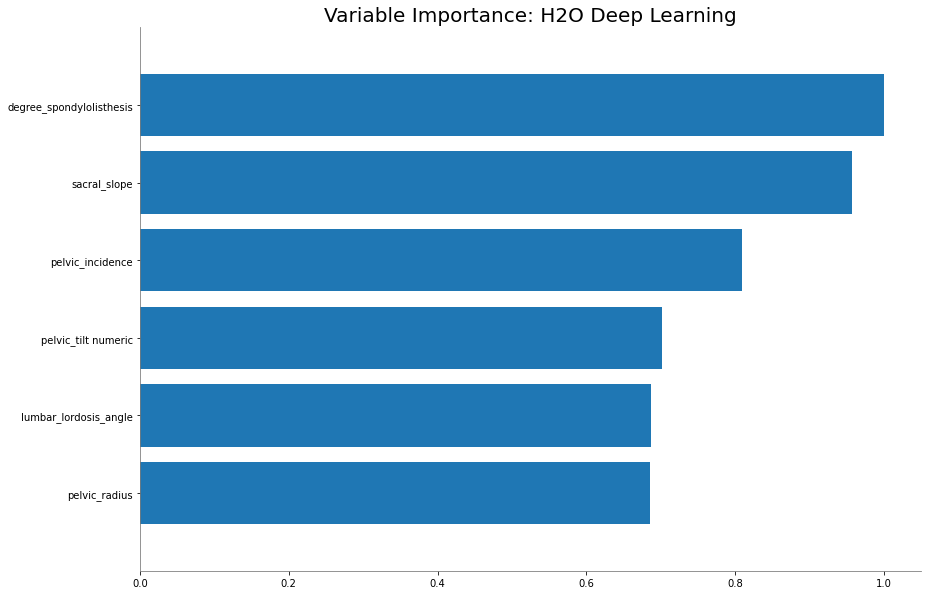

In [ ]:
dl.varimp_plot()

#모델 저장

In [ ]:
aml.leader.download_mojo(path = BASE_DIR)

'/content/DRF_1_AutoML_20200622_014252.zip'